In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing

import numpy as np
#from numpy.core.numeric import NaN

from joblib import dump, load

from tensorflow import keras
import random
import sklearn
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers.legacy import Adam, SGD

import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
df = pd.read_excel('1-Extrait_Verbatim_Enq_Satisfaction_Patients HC 2023(1-1245)_mai2024.xlsx')
df = df.fillna('')

# DEFINE X !!!!!!
#X =
X = np.array([df['Verbatim'][0]])

encoder = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [6]:
model_3_classes = keras.models.load_model('Best_model_ElogeOrNot_25012025bis.keras')
model_7_classes = keras.models.load_model('Best_model_model_7_classes_25012025.keras')

ElogeOrNot_preds = model_3_classes.predict(encoder(X))
SevenClasses_preds = model_7_classes.predict(encoder(X))

print(ElogeOrNot_preds)
print(SevenClasses_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[2.2763670e-06 2.6001753e-06 9.9999726e-01]]
[[1.2739166e-03 9.9700159e-01 1.5045504e-02 1.2582156e-03 2.5635643e-04
  2.7698930e-05 4.9654423e-06]]


## Entrainement du modèle Eloge / Insatisfaction

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 2048)           │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,675,139 (14.02 MB)

 Trainable params: 3,675,139 (14.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6583 - loss: 0.6783 - val_AUC: 0.8808 - val_loss: 0.6297
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8879 - loss: 0.6058 - val_AUC: 0.8885 - val_loss: 0.5432
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8942 - loss: 0.5159 - val_AUC: 0.9088 - val_loss: 0.4461
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9300 - loss: 0.4006 - val_AUC: 0.9343 - val_loss: 0.3498
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.9543 - loss: 0.3150 - val_AUC: 0.9737 - val_loss: 0.2664
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9821 - loss: 0.2364 - val_AUC: 0.9795 - val_loss: 0.2065
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.9906 - loss: 0.1580 - val_AUC: 0.9830 - val_loss: 0.1702
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.9964 - loss: 0.1085 - val_AUC: 0.9847 - val_loss: 0.1521
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - A

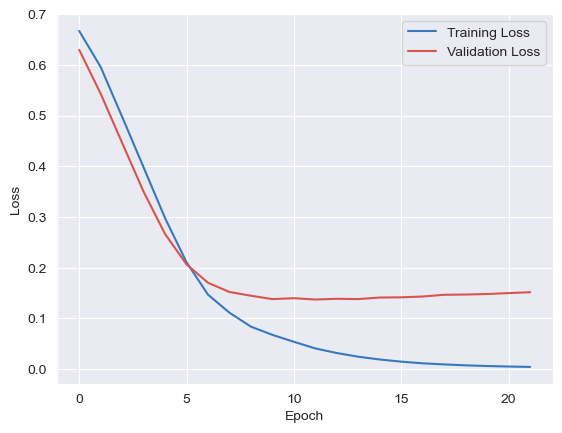

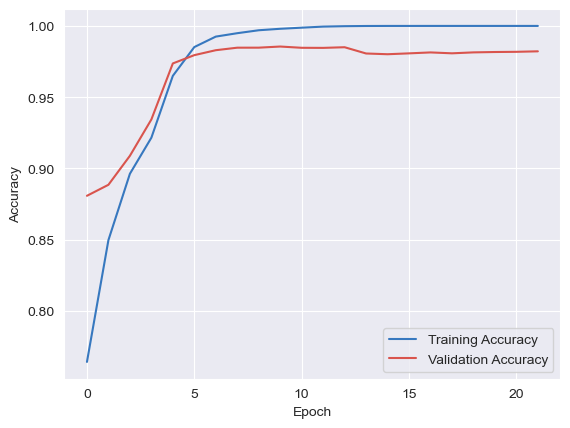

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9822 - loss: 0.1715
Mean AUC score: [0.1516219973564148, 0.982177734375]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9822 - loss: 0.1715


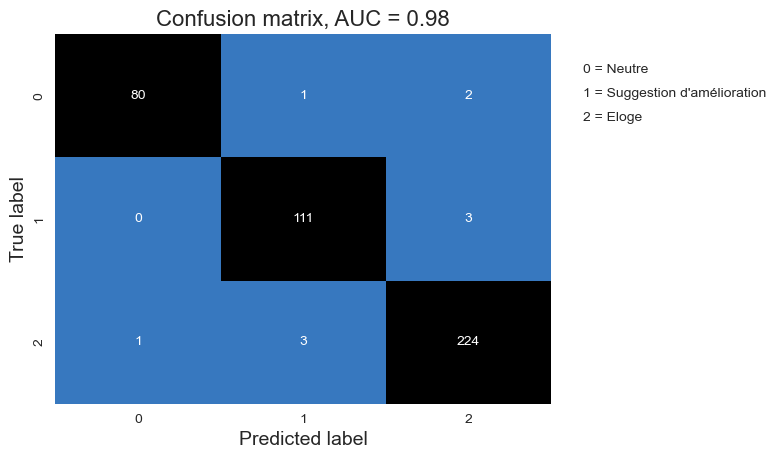

In [57]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_excel('1-Extrait_Verbatim_Enq_Satisfaction_Patients HC 2023(1-1245)_mai2024.xlsx')
df = df.fillna('')

x_train, x_test, y_train, y_test = train_test_split(df['Verbatim'],
                                                    df["Catégories Verbatims Neutre-SA-Eloge"],
                                                    test_size=0.3,
                                                    stratify=df["Catégories Verbatims Neutre-SA-Eloge"],
                                                    random_state=7)



#pour l'utilisation de softmax:
y_train=keras.utils.to_categorical(y_train, num_classes=3)#'float32'
y_test=keras.utils.to_categorical(y_test, num_classes=3)#'float32'

encoder = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

x_train = encoder(x_train)
x_test = encoder(x_test)


# Set the environment variable if you want to use the legacy Keras
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

# Define the input shape
input_shape = x_train[0].shape

# Define the model
model = tf.keras.models.Sequential()

# Add Input layer
model.add(tf.keras.layers.Input(shape=input_shape))

# Add additional layers
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

# Print model summary
model.summary()

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['AUC'])

# Define callbacks
earlystop = EarlyStopping(monitor='val_loss', patience=10)


history=model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), callbacks=[earlystop])

model.save('Best_model_ElogeOrNot_25012025bis.keras')
model_3_classes = keras.models.load_model('Best_model_ElogeOrNot_25012025bis.keras')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['AUC'], label='Training Accuracy')
plt.plot(history.history['val_AUC'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

X = np.array(df['Verbatim'])
Y = np.array(df["Catégories Verbatims Neutre-SA-Eloge"])

legend1 = "0 = Neutre"
legend2 = "1 = Suggestion d'amélioration"
legend3 = "2 = Eloge"

#custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "brown", "brown", "teal", "black"]
custom_palette = [sns.xkcd_rgb["windows blue"], "black", "black","black"]
sns.set_palette(custom_palette)

results = []
y_preds=model.predict(encoder(X))
for elm in y_preds:
    results.append(np.argmax(elm))
y_preds = results
print('Mean AUC score:',model.evaluate(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)

ax = sns.heatmap(tf.math.confusion_matrix(labels=Y, predictions=y_preds),annot=True,cbar=False,fmt='d',cmap=custom_palette)
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix, AUC = ' + str(round(accuracy,2)),fontsize=16);
plt.gcf().text(0.95,0.8, legend1)
plt.gcf().text(0.95,0.75, legend2)
plt.gcf().text(0.95,0.7, legend3)

#plt.savefig("Matrice de confusion multiclass verbatims_mai2024", dpi=400, bbox_inches="tight")
plt.show()

## Entrainement du modèle 7 classe

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 2048)           │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,677,191 (14.03 MB)

 Trainable params: 3,677,191 (14.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - AUC: 0.7381 - loss: 0.6788 - val_AUC: 0.8818 - val_loss: 0.6265
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8744 - loss: 0.6007 - val_AUC: 0.8870 - val_loss: 0.5112
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8800 - loss: 0.4698 - val_AUC: 0.8821 - val_loss: 0.3624
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8830 - loss: 0.3318 - val_AUC: 0.8835 - val_loss: 0.2856
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8991 - loss: 0.2671 - val_AUC: 0.8948 - val_loss: 0.2539
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.9265 - loss: 0.2263 - val_AUC: 0.9154 - val_loss: 0.2295
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.9505 - loss: 0.1919 - val_AUC: 0.9296 - val_loss: 0.2117
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.9468 - loss: 0.1916 - val_AUC: 0.9425 - val_loss: 0.1978
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - A

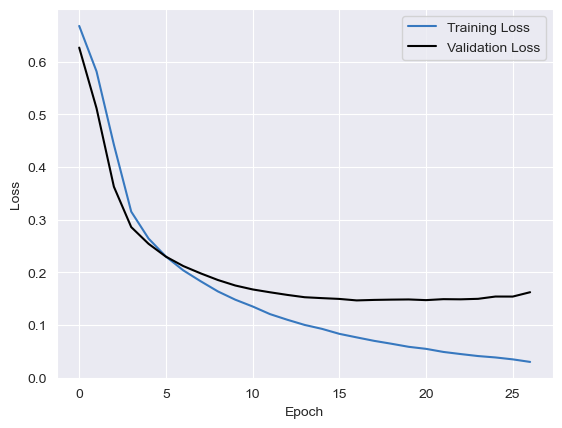

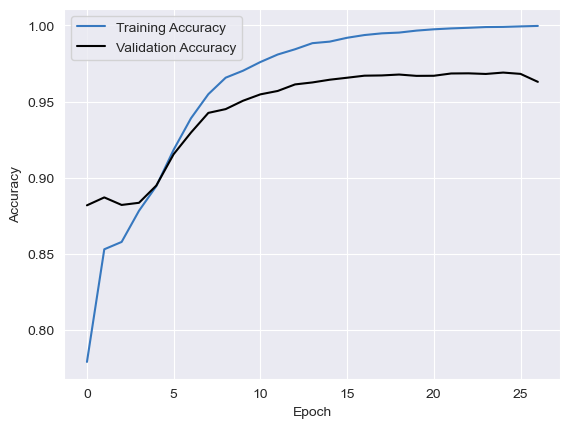

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9611 - loss: 0.1701
Mean AUC score: [0.1619793325662613, 0.962931215763092]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9611 - loss: 0.1701


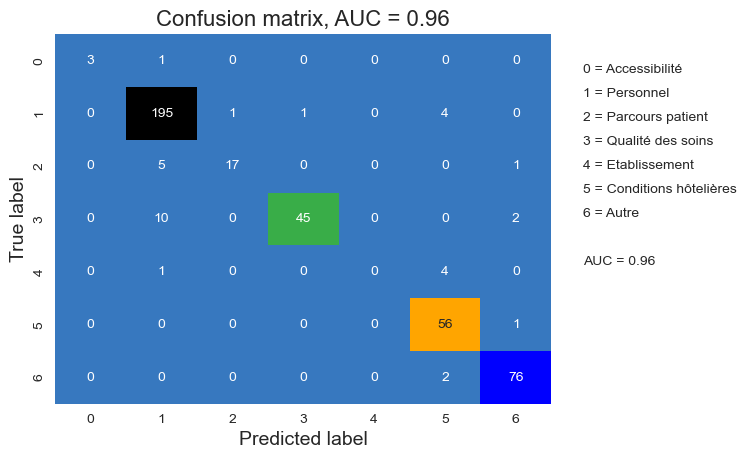

In [58]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_excel('1-Extrait_Verbatim_Enq_Satisfaction_Patients HC 2023(1-1245)_mai2024.xlsx')
df = df.fillna('')

X_np = np.array(df['Verbatim'])
Y = np.array(df["Catégories Verbatims"])
x_train, x_test, y_train, y_test = train_test_split(X_np,
                                                    Y,
                                                    test_size=0.3,
                                                    stratify=df["Catégories Verbatims"],
                                                    random_state=7)

#pour l'utilisation de softmax:
y_train=keras.utils.to_categorical(y_train, num_classes=7)#'float32'
y_test=keras.utils.to_categorical(y_test, num_classes=7)#'float32'

encoder = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

x_train = encoder(x_train)
x_test = encoder(x_test)


# Set the environment variable if you want to use the legacy Keras
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

# Define the input shape
input_shape = x_train[0].shape

# Define the model
model = tf.keras.models.Sequential()

# Add Input layer
model.add(tf.keras.layers.Input(shape=input_shape))

# Add additional layers
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(7, activation='sigmoid'))

# Print model summary
model.summary()

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['AUC'])

# Define callbacks
earlystop = EarlyStopping(monitor='val_loss', patience=10)


history=model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), callbacks=[earlystop])

model.save('Best_model_model_7_classes_25012025.keras')
model_7_classes = keras.models.load_model('Best_model_model_7_classes_25012025.keras')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['AUC'], label='Training Accuracy')
plt.plot(history.history['val_AUC'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

X = np.array(df['Verbatim'])
Y = np.array(df["Catégories Verbatims"])

legend1 = "0 = Accessibilité"
legend2 = "1 = Personnel"
legend3 = "2 = Parcours patient"
legend4 = "3 = Qualité des soins"
legend5 = "4 = Etablissement"
legend6 = "5 = Conditions hôtelières"
legend7 = "6 = Autre"
legend8 = "AUC = 0.96"

custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"]
sns.set_palette(custom_palette)

results = []
y_preds=model.predict(encoder(X))
for elm in y_preds:
    results.append(np.argmax(elm))
y_preds = results
print('Mean AUC score:',model.evaluate(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)

ax = sns.heatmap(tf.math.confusion_matrix(labels=Y, predictions=y_preds),annot=True,cbar=False,fmt='d',cmap=custom_palette)
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix, AUC = ' + str(round(accuracy,2)),fontsize=16);
plt.gcf().text(0.95,0.8, legend1)
plt.gcf().text(0.95,0.75, legend2)
plt.gcf().text(0.95,0.7, legend3)
plt.gcf().text(0.95,0.65, legend4)
plt.gcf().text(0.95,0.6, legend5)
plt.gcf().text(0.95,0.55, legend6)
plt.gcf().text(0.95,0.5, legend7)
plt.gcf().text(0.95,0.4, legend8)

plt.savefig("Matrice de confusion multiclass_7 verbatims_mai2024_janv2025", dpi=400, bbox_inches="tight")
plt.show()

## Entrainement du modèle Eloge / Insatisfaction -- mode dev

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df['Verbatim'], 
                                                    df["Catégories Verbatims Neutre-SA-Eloge"], 
                                                    test_size=0.3, 
                                                    stratify=df["Catégories Verbatims Neutre-SA-Eloge"], 
                                                    random_state=7)

In [5]:
y_train =np.array(y_train).astype(int)
y_test =np.array(y_test).astype(int)

In [ ]:
#pour l'utilisation de softmax:
y_train=keras.utils.to_categorical(y_train, num_classes=3, dtype=y_train.dtype)#'float32'
y_test=keras.utils.to_categorical(y_test, num_classes=3, dtype=y_train.dtype)#'float32'

In [6]:
#pour l'utilisation de softmax:
y_train=keras.utils.to_categorical(y_train, num_classes=3)#'float32'
y_test=keras.utils.to_categorical(y_test, num_classes=3)#'float32'

In [ ]:
#pip install tensorflow==2.1.0

In [7]:
encoder = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [8]:
x_train=encoder(x_train)
x_test=encoder(x_test)

In [31]:
x_train

<tf.Tensor: shape=(297, 512), dtype=float32, numpy=
array([[-0.07614079,  0.01934992, -0.03154971, ..., -0.05273332,
        -0.03662401,  0.01706332],
       [ 0.05175654, -0.0318096 ,  0.04204573, ...,  0.06099835,
        -0.00315966, -0.00808176],
       [-0.06949688,  0.06526012,  0.01727963, ..., -0.03669272,
        -0.02800602,  0.02085188],
       ...,
       [-0.01868059,  0.00461093, -0.00625951, ...,  0.00544337,
        -0.02824383, -0.06017214],
       [ 0.0146097 , -0.02508612,  0.02135117, ..., -0.03652751,
        -0.05356716,  0.02833682],
       [ 0.00924056, -0.04322613,  0.05000741, ..., -0.07712203,
        -0.0320999 ,  0.03617555]], dtype=float32)>

In [9]:
input_shape = x_train[0].shape

In [10]:
input_shape

TensorShape([512])

In [12]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set the environment variable if you want to use the legacy Keras
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

# Define the input shape
input_shape = input_shape  # Replace 'your_input_shape' with the actual input shape

# Define the model
model = tf.keras.models.Sequential()

# Add Input layer
model.add(tf.keras.layers.Input(shape=input_shape))

# Add additional layers
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

# Print model summary
model.summary()

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['AUC'])

# Define callbacks
earlystop = EarlyStopping(monitor='val_loss', patience=10)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2048)           │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,675,139 (14.02 MB)

 Trainable params: 3,675,139 (14.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history=model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), callbacks=[earlystop])

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7206 - loss: 0.6746 - val_AUC: 0.8836 - val_loss: 0.6204
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8646 - loss: 0.5992 - val_AUC: 0.8879 - val_loss: 0.5283
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8956 - loss: 0.5002 - val_AUC: 0.9057 - val_loss: 0.4348
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9152 - loss: 0.4104 - val_AUC: 0.9342 - val_loss: 0.3493
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9512 - loss: 0.3095 - val_AUC: 0.9662 - val_loss: 0.2725
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9793 - loss: 0.2373 - val_AUC: 0.9800 - val_loss: 0.2146
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9927 - loss: 0.1628 - val_AUC: 0.9807 - val_loss: 0.1812
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9932 - loss: 0.1303 - val_AUC: 0.9843 - val_loss: 0.1579
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - A

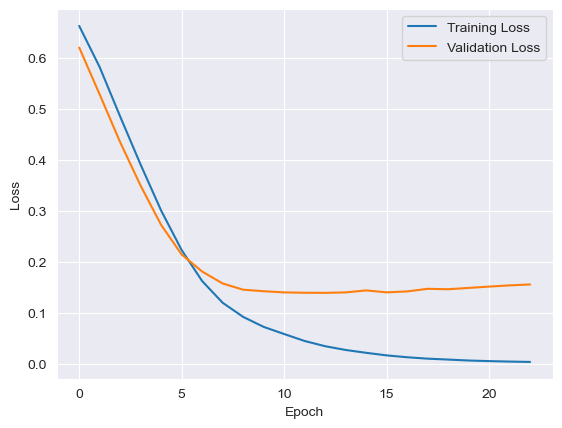

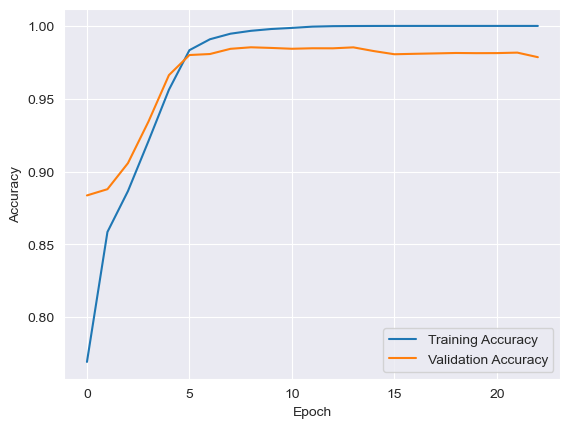

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['AUC'], label='Training Accuracy')
plt.plot(history.history['val_AUC'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
# Eloge
eloge = model.predict(encoder(["Personnels à l'écoute, disponibles et une bonne humeur de l'équipe soignante qui était bien venue pendant cette hospitalisation. Des informations rassurantes données par l'infirmière à ma sortie."]))
print("Probabilité : " + str(eloge))
# Pas éloge
peloge = model.predict(encoder(["Les repas son vraiment pas terrible. Désolé"]))
print("Probabilité : " + str(peloge))
# Neutre
neutre = model.predict(encoder(["Rien de particulier."]))
print("Probabilité : " + str(neutre))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Probabilité : [[4.5334546e-06 9.9585326e-03 9.9683028e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Probabilité : [[0.0018842  0.9942205  0.00134942]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Probabilité : [[9.9854374e-01 6.4961368e-04 1.1179880e-03]]


In [33]:
with tf.device('/CPU:0'):
    model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9762 - loss: 0.1743


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9762 - loss: 0.1743 
Mean AUC score: [0.15598224103450775, 0.9785308837890625]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9762 - loss: 0.1743


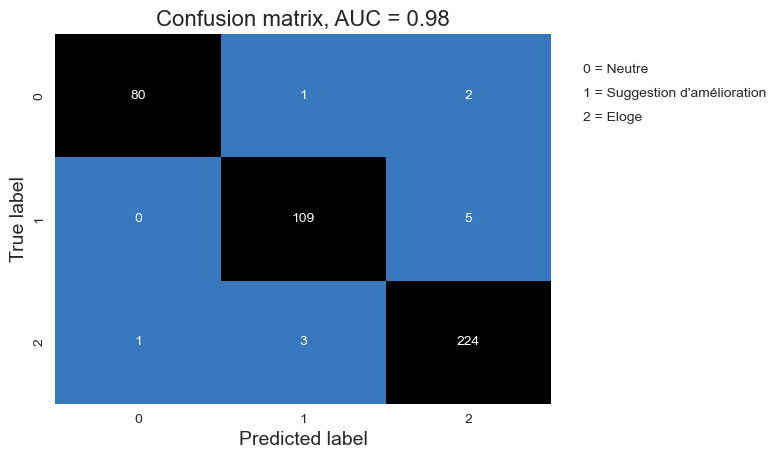

In [36]:
X = np.array(df['Verbatim'])
Y = np.array(df["Catégories Verbatims Neutre-SA-Eloge"])

legend1 = "0 = Neutre"
legend2 = "1 = Suggestion d'amélioration"
legend3 = "2 = Eloge"

#custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "brown", "brown", "teal", "black"]
custom_palette = [sns.xkcd_rgb["windows blue"], "black", "black","black"]
sns.set_palette(custom_palette)

results = []
y_preds=model.predict(encoder(X))
for elm in y_preds:
    results.append(np.argmax(elm))
y_preds = results
print('Mean AUC score:',model.evaluate(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)

ax = sns.heatmap(tf.math.confusion_matrix(labels=Y, predictions=y_preds),annot=True,cbar=False,fmt='d',cmap=custom_palette)
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix, AUC = ' + str(round(accuracy,2)),fontsize=16);
plt.gcf().text(0.95,0.8, legend1)
plt.gcf().text(0.95,0.75, legend2)
plt.gcf().text(0.95,0.7, legend3)

#plt.savefig("Matrice de confusion multiclass verbatims_mai2024", dpi=400, bbox_inches="tight")
plt.show()

In [41]:
TP = 224
TN = 80+111
FP = 5
FN = 1+3
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print("sensitivity = " + str(sensitivity))
print("specificity = " + str(specificity))

sensitivity = 0.9824561403508771
specificity = 0.9744897959183674


4/4 [==============================] - 0s 5ms/step - loss: 0.1628 - auc: 0.9821
Mean AUC score: [0.1627538502216339, 0.9821014404296875]
4/4 [==============================] - 0s 5ms/step - loss: 0.1628 - auc: 0.9821


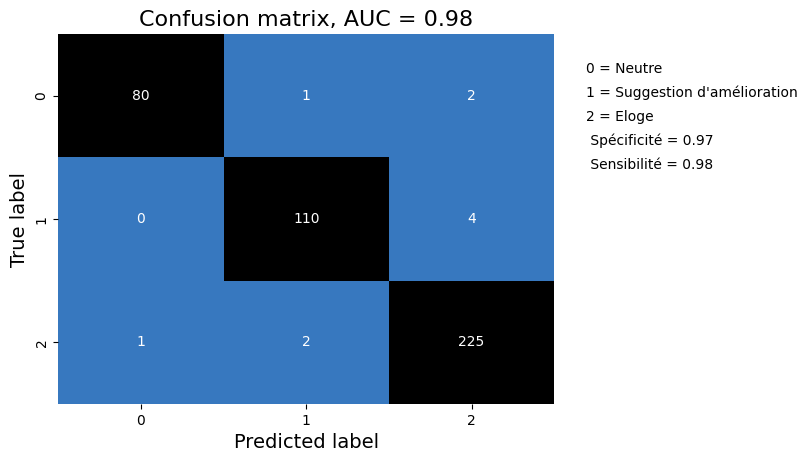

In [42]:
X = np.array(df['Verbatim'])
Y = np.array(df["Catégories Verbatims Neutre-SA-Eloge"])

legend1 = "0 = Neutre"
legend2 = "1 = Suggestion d'amélioration"
legend3 = "2 = Eloge"
legend4 = " Spécificité = " + str(round(specificity,2))
legend5 = " Sensibilité = " + str(round(sensitivity,2))

#custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "brown", "brown", "teal", "black"] 
custom_palette = [sns.xkcd_rgb["windows blue"], "black", "black","black"] 
sns.set_palette(custom_palette)

results = []
y_preds=model.predict(X)
for elm in y_preds:
    results.append(np.argmax(elm))
y_preds = results
print('Mean AUC score:',model.evaluate(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)
    
ax = sns.heatmap(tf.math.confusion_matrix(labels=Y, predictions=y_preds),annot=True,cbar=False,fmt='d',cmap=custom_palette)
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix, AUC = ' + str(round(accuracy,2)),fontsize=16);
plt.gcf().text(0.95,0.8, legend1)
plt.gcf().text(0.95,0.75, legend2)
plt.gcf().text(0.95,0.7, legend3)
plt.gcf().text(0.95,0.65, legend4)
plt.gcf().text(0.95,0.6, legend5)

plt.savefig("Matrice de confusion elogeNeutreSA_mai2024", dpi=400, bbox_inches="tight")
plt.show()

In [37]:
model.save('Best_model_ElogeOrNot_Neutral_25012025.keras')

In [38]:
model = keras.models.load_model('Best_model_ElogeOrNot_Neutral_25012025.keras')

## Entrainement du modèle catégorisation des verbatims en multiclass x7 -- mode dev

In [39]:
df = pd.read_excel('1-Extrait_Verbatim_Enq_Satisfaction_Patients HC 2023(1-1245)_mai2024.xlsx')
df = df.fillna('')

In [40]:
df

,ID,Verbatim,Eloge / Suggestion d'amélioration / Neutre,Classement thématique,Service d'hospitalisation,Date de réception du questionnaire,Catégories Verbatims,Accesibilité,Personnel,Parcours patient,Qualité des soins,Etablissement,Conditions hôtelières,Autre,Catégories Verbatims Neutre-SA-Eloge,Neutre,Suggestion d'amélioration,Eloge
0,1,De la bienveillance de tout le personnel de tous les secteurs confondus . Et je les remercie .,Eloge,Personnel - Qualité humaine;Personnel - Remerciement,1ER-Chirurgieconventionnelle,2022-10-13,1,0,1,0,0,0,0,0,2,0,0,1
1,2,"disponibilité du personnel, toujours à l'écoute",Eloge,"Personnel - Disponibilité, réactivité, efficacité;Personnel - Écoute et attention",1ER-Chirurgieconventionnelle,2022-10-13,1,0,1,0,0,0,0,0,2,0,0,1
2,3,l'ambiance et la prise en charge sont toujours agréables,Eloge,Qualité des soins - Prise en charge globale,4EME-HDSSoinsdesupport,2022-10-14,3,0,0,0,1,0,0,0,2,0,0,1
3,4,la qualite du personnel,Eloge,"Personnel - Compétences, sérieux et professionnalisme",1ER-Chirurgieconventionnelle,2022-10-14,1,0,1,0,0,0,0,0,2,0,0,1
4,5,,Eloge,,4EME-HDSOncologiedesemaine,2022-10-14,6,0,0,0,0,0,0,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,421,Rien du tout,Neutre,,4EME-HDSOncologiedesemaine,2023-09-29,6,0,0,0,0,0,0,1,0,1,0,0
421,422,Pas assez de chambre individuelle,SA,Conditions hôtelières - Chambre (confort / chambre individuelle),4EME-HDSOncologiedesemaine,2023-09-29,5,0,0,0,0,0,1,0,1,0,1,0
422,423,L?accessibilité au centre due aux travaux du nouveau CHU en cours !,SA,Accessibilité - Accès handicap / physique,1ER-Chirurgieconventionnelle,2023-09-30,0,0,0,0,0,0,0,0,1,0,1,0
423,424,Rien,Neutre,,4EME-HDSSoinsdesupport,2023-10-01,6,0,0,0,0,0,0,1,0,1,0,0


In [41]:
X_np   = np.array(df['Verbatim'])
Y = np.array(df["Catégories Verbatims"])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X_np, 
                                                    Y, 
                                                    test_size=0.3, 
                                                    stratify=df["Catégories Verbatims"], 
                                                    random_state=7)

In [43]:
#pour l'utilisation de softmax:
y_train=keras.utils.to_categorical(y_train, num_classes=7)#'float32'
y_test=keras.utils.to_categorical(y_test, num_classes=7)#'float32'

In [44]:
x_train = encoder(x_train)
x_test = encoder(x_test)

In [45]:
y_train[0:10]

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

In [90]:
x_train[0:10]

array(["Bonjour Je tien a remercier le personnels les Médecins tous le personnelles leur gentillesse dévouement tous a était parfait notre fille a était en confiance totale  ainsi que nous ses parents bien écouter le personnels très attentif admirable encore merci je leur donne la Médaille d'honneur du mérite ( ses parents )",
       'Juste les repas à améliorer.',
       "Très bon souvenir de certaines infirmières que je n'oublierai pas",
       'Une très bonne écoute du malade . De la gentillesse de la part des soignants .',
       "J ai demandé un tramadol mais l infirmière m'a dit que cela ne m'était plus prescrit hors le tramadol me faisait plus effet que le doliprane. C était le week-end donc plus de medecin pour demander.  Pas grave mais dommage par contre quand je suis sorti j ai eu une prescription de tramadol.",
       'Chambre double imposée.',
       "Equipe toujours à l'écoute. si le moral n'est pas bon on vient rapidement comprendre pourquoi vous êtes dans cet état.",
   

In [51]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set the environment variable if you want to use the legacy Keras
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

# Define the input shape
input_shape = input_shape  # Replace 'your_input_shape' with the actual input shape

# Define the model
model = tf.keras.models.Sequential()

# Add Input layer
model.add(tf.keras.layers.Input(shape=input_shape))

# Add additional layers
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(7, activation='sigmoid'))

# Print model summary
model.summary()

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['AUC'])

# Define callbacks
earlystop = EarlyStopping(monitor='val_loss', patience=10)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 2048)           │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,677,191 (14.03 MB)

 Trainable params: 3,677,191 (14.03 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history=model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), callbacks=[earlystop])

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - AUC: 0.7668 - loss: 0.6774 - val_AUC: 0.8841 - val_loss: 0.6224
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.8643 - loss: 0.5952 - val_AUC: 0.8866 - val_loss: 0.5044
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.8713 - loss: 0.4661 - val_AUC: 0.8836 - val_loss: 0.3591
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.8924 - loss: 0.3261 - val_AUC: 0.8829 - val_loss: 0.2906
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.8989 - loss: 0.2683 - val_AUC: 0.8928 - val_loss: 0.2617
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.9213 - loss: 0.2344 - val_AUC: 0.9121 - val_loss: 0.2368
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.9366 - loss: 0.2131 - val_AUC: 0.9263 - val_loss: 0.2188
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.9551 - loss: 0.1783 - val_AUC: 0.9363 - val_loss: 0.2040
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/st

In [103]:
#dump(model, 'Best_model_multiclass_x7_mai2024_25012025.joblib')

['Best_model_multiclass_x7_mai2024_03062024.joblib']

In [258]:
#model = load('Best_model_multiclass_x7_mai2024_03062024.joblib')

In [53]:
model.save('Best_model_multiclass_x7_25012025.keras')

In [49]:
model = keras.models.load_model('Best_model_multiclass_x7_25012025.keras')

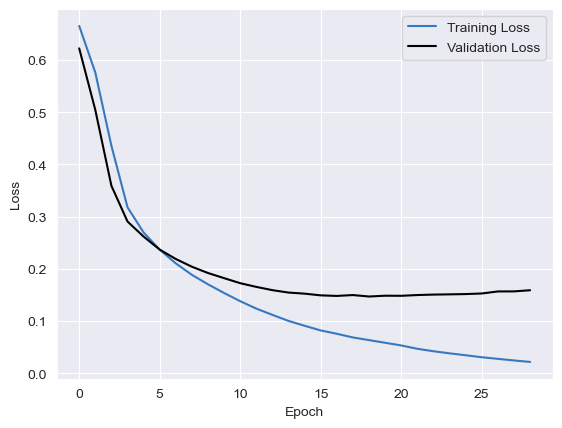

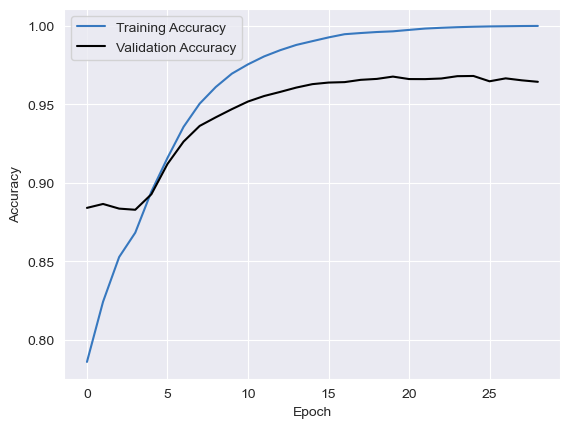

In [54]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['AUC'], label='Training Accuracy')
plt.plot(history.history['val_AUC'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [95]:
# Personnel
pred = model.predict(["très bonnes compétences du chirurgien et de oncologue toujours bienveillants et à l'écoute"])
print("Probabilité : " + str(pred))

# Conditions hôtelières
pred = model.predict(["Le manque de chambres qui a fait que j'ai été en chambre double la première nuit avec une personne qui ne dormait pas et allumait la lumière et faisait sa vie comme si elle était seule."])
print("Probabilité : " + str(pred))

1/1 [==============================] - 0s 190ms/step
Probabilité : [[1.0061808e-05 9.9873787e-01 1.1330361e-03 1.0947762e-04 2.2348604e-06
  7.2808953e-06 6.4503190e-08]]
1/1 [==============================] - 0s 21ms/step
Probabilité : [[1.6465376e-04 4.4220481e-02 4.6452403e-04 4.4743167e-05 1.4615977e-04
  9.5495528e-01 4.1304115e-06]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9646 - loss: 0.1641
Mean AUC score: [0.15893179178237915, 0.9643452167510986]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9646 - loss: 0.1641


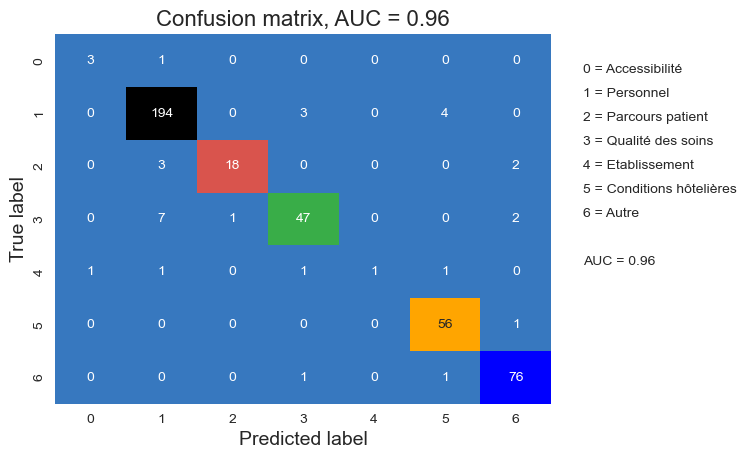

In [55]:
X = np.array(df['Verbatim'])
Y = np.array(df["Catégories Verbatims"])

legend1 = "0 = Accessibilité"
legend2 = "1 = Personnel"
legend3 = "2 = Parcours patient"
legend4 = "3 = Qualité des soins"
legend5 = "4 = Etablissement"
legend6 = "5 = Conditions hôtelières"
legend7 = "6 = Autre"
legend8 = "AUC = 0.96"

custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette)

results = []
y_preds=model.predict(encoder(X))
for elm in y_preds:
    results.append(np.argmax(elm))
y_preds = results
print('Mean AUC score:',model.evaluate(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)
    
ax = sns.heatmap(tf.math.confusion_matrix(labels=Y, predictions=y_preds),annot=True,cbar=False,fmt='d',cmap=custom_palette)
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix, AUC = ' + str(round(accuracy,2)),fontsize=16);
plt.gcf().text(0.95,0.8, legend1)
plt.gcf().text(0.95,0.75, legend2)
plt.gcf().text(0.95,0.7, legend3)
plt.gcf().text(0.95,0.65, legend4)
plt.gcf().text(0.95,0.6, legend5)
plt.gcf().text(0.95,0.55, legend6)
plt.gcf().text(0.95,0.5, legend7)
plt.gcf().text(0.95,0.4, legend8)

plt.savefig("Matrice de confusion multiclass_7 verbatims_mai2024_janv2025", dpi=400, bbox_inches="tight")
plt.show()

## Entrainement du modèle catégorisation des verbatims en multiclass x39

In [56]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_excel('1-Extrait_Verbatim_Enq_Satisfaction_Patients HC 2023(1-1245)_mai2024_multiclass_select.xlsx')
df = df.fillna('')

X_np   = np.array(df['Verbatim'])
Y = np.array(df["Catégories Verbatims"])

x_train, x_test, y_train, y_test = train_test_split(X_np,
                                                    Y,
                                                    test_size=0.3,
                                                    stratify=Y,
                                                    random_state=7)

#pour l'utilisation de softmax:
y_train=keras.utils.to_categorical(y_train, num_classes=11)#'float32'
y_test=keras.utils.to_categorical(y_test, num_classes=11)#'float32'

x_train = encoder(x_train)
x_test = encoder(x_test)


# Set the environment variable if you want to use the legacy Keras
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

# Define the input shape
input_shape = input_shape  # Replace 'your_input_shape' with the actual input shape

# Define the model
model = tf.keras.models.Sequential()

# Add Input layer
model.add(tf.keras.layers.Input(shape=input_shape))

# Add additional layers
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(11, activation='sigmoid'))

# Print model summary
model.summary()

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['AUC'])

# Define callbacks
earlystop = EarlyStopping(monitor='val_loss', patience=10)


history=model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), callbacks=[earlystop])

model.save('Best_model_multiclass_x11_25012025.keras')
model_11_classes = keras.models.load_model('Best_model_multiclass_x11_25012025.keras')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['AUC'], label='Training Accuracy')
plt.plot(history.history['val_AUC'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

X = X_np
Y = Y

legend1 = "0 = Disponibilité, réactivité, efficacité"
legend2 = "1 = Ecoute et attention"
legend3 = "2 = Compétences, sérieux et professionnalisme"
legend4 = "3 = Informations, explications et conseils"
legend5 = "4 = Qualités humaines"
legend6 = "5 = Accueil et admission"
legend7 = "6 = Qualité de soins"
legend8 = "7 = Chambre (confort / chambre individuelle)"
legend9 = "8 = Bruit/calme"
legend10 = "9 = Alimentation"
legend11 = "10 = Autre"

legend12 = "AUC = 0.95"

custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"]
sns.set_palette(custom_palette)

results = []
y_preds=model.predict(endcoder(X))
for elm in y_preds:
    results.append(np.argmax(elm))
y_preds = results
print('Mean AUC score:',model.evaluate(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)

ax = sns.heatmap(tf.math.confusion_matrix(labels=Y, predictions=y_preds),annot=True,cbar=False,fmt='d',cmap=custom_palette)
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix, AUC = ' + str(round(accuracy,2)),fontsize=16);
plt.gcf().text(0.95,0.8, legend1)
plt.gcf().text(0.95,0.75, legend2)
plt.gcf().text(0.95,0.7, legend3)
plt.gcf().text(0.95,0.65, legend4)
plt.gcf().text(0.95,0.6, legend5)
plt.gcf().text(0.95,0.55, legend6)
plt.gcf().text(0.95,0.5, legend7)
plt.gcf().text(0.95,0.45, legend8)
plt.gcf().text(0.95,0.4, legend9)
plt.gcf().text(0.95,0.35, legend10)
plt.gcf().text(0.95,0.3, legend11)
plt.gcf().text(0.95,0.2, legend12)
plt.savefig("Matrice de confusion multiclass_11 verbatims_mai2024", dpi=400, bbox_inches="tight")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '1-Extrait_Verbatim_Enq_Satisfaction_Patients HC 2023(1-1245)_mai2024_multiclass_select.xlsx'